# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Import Module
from citipy import citipy
import pandas as pd
import numpy as np
import json 
import requests
import matplotlib.pyplot as plt
from config import api_key
import time
from datetime import datetime
import scipy.stats as st
import os

## Generate Cities List

In [7]:
cities,lng, lat, countrycode =[], [], [], []

#parameter
max_temp,humid,cloud,wind,date=[],[],[],[],[]

count=0
# cities_df = pd.DataFrame({'Lng':lng, 'Lat':lat,'City':cities,'Country':Country})
while count < 600:
    c_lng = np.random.uniform(-1.8,1.8,1)*100
    c_lat = np.random.uniform(-.9,.9,1)*100
    city = (citipy.nearest_city(c_lat, c_lng))
    name=city.city_name
    country=city.country_code

    # Creating first data
    if count == 0:
        cities.append(name.upper())
        countrycode.append(country.upper())
        lng.append(c_lng[0])
        lat.append(c_lat[0])
        count+=1

        # print(cities)
    else:
        if name.upper() in cities:
            count=count
            # print(f'{count}, {name} is duplicate')
            # print(f"Yes, '{name}' found in List : ", cities)
        else:
            cities.append(name.upper())
            countrycode.append(country.upper())
            lng.append(c_lng[0])
            lat.append(c_lat[0])
            count+=1

    
cities_df = pd.DataFrame({'Lng':lng, 'Lat':lat,'City':cities,'Country':countrycode})

# Create empty column dataframe
cities_df["Max Temp"]=""
cities_df["Humidity"]= ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Date"] = ""

# Check for duplicate
cities_df.groupby('City').count()

,Lng,Lat,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City,,,,,,,,
ABHA,1,1,1,1,1,1,1,1
ACAPULCO,1,1,1,1,1,1,1,1
ACARAU,1,1,1,1,1,1,1,1
ADRAR,1,1,1,1,1,1,1,1
ADRE,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
ZHANAKORGAN,1,1,1,1,1,1,1,1
ZHAOTONG,1,1,1,1,1,1,1,1
ZHUHAI,1,1,1,1,1,1,1,1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# API Call
print('Beginning Data Retrieval')     
print('-----------------------------')

for index, row in cities_df.iterrows():

    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row['City']
    qurl = url + '&q=' + city +'&units=imperial'+'&appid='+api_key

    # print(row['City'])
    
    try:
        # response = requests.get(query_url).json()
        
        response = requests.get(qurl).json()
        time.sleep(1.5)
        print(f'Processing Record {index} of {len(cities_df)} | {city}')
        # # print(json.dumps(response['main'], indent = 4))
        cities_df.at[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.at[index, 'Humidity'] = response['main']['humidity']
        cities_df.at[index, 'Cloudiness'] = response["clouds"]["all"]
        cities_df.at[index, 'Wind Speed'] = response["wind"]["speed"]
        cities_df.at[index, 'Date'] = response["dt"]

        # if (index % 50) == 0:
        #     time.sleep(20)
        #     print('Limiting Call to API')

    except (KeyError, IndexError):
        print("City weather data not found... skipping.")
        
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 0 of 600 | PHANGNGA
Processing Record 1 of 600 | JAMESTOWN
Processing Record 2 of 600 | BURNIE
Processing Record 3 of 600 | CAPE TOWN
Processing Record 4 of 600 | MATAURA
Processing Record 5 of 600 | NEON MONASTIRION
Processing Record 6 of 600 | USHUAIA
Processing Record 7 of 600 | RIKITEA
Processing Record 8 of 600 | TUKTOYAKTUK
Processing Record 9 of 600 | SAO FILIPE
Processing Record 10 of 600 | ATUONA
Processing Record 11 of 600 | ATHABASCA
Processing Record 12 of 600 | PONTA DO SOL
Processing Record 13 of 600 | BARENTSBURG
City weather data not found... skipping.
Processing Record 14 of 600 | FORTUNA
Processing Record 15 of 600 | AMDERMA
City weather data not found... skipping.
Processing Record 16 of 600 | CLYDE RIVER
Processing Record 17 of 600 | KAVIENG
Processing Record 18 of 600 | PARALIMNI
Processing Record 19 of 600 | WAINGAPU
Processing Record 20 of 600 | WARQLA
City weather data not found... skipping

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Remove all the city without weather data
final_city = cities_df[cities_df['Max Temp'] != '']
#  Rearrange columns
final_city = final_city[['City','Country', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 
'Wind Speed', 'Date']]
# Convert to float
final_city = final_city.astype({'Max Temp': 'float64',
                'Humidity': 'float64',
                'Cloudiness': 'float64',
                'Wind Speed': 'float64'
               })

date_time = [datetime.fromtimestamp(timestamp) for timestamp in final_city['Date']]
new_date = [value.strftime("%d/%m/%Y") for value in date_time]

final_city['Date'] = new_date
# Save the DataFrame as a csv
final_city.to_csv("city_weather_data.csv", encoding="utf-8", index=False)
final_city.describe()
final_city = final_city.dropna()
final_city.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,PHANGNGA,TH,8.842525,96.847843,89.01,79.0,40.0,2.30,26/04/2021
1,JAMESTOWN,SH,-25.059761,-16.012519,34.00,86.0,40.0,10.36,26/04/2021
2,BURNIE,AU,-42.045349,145.492409,63.00,58.0,11.0,11.01,26/04/2021
3,CAPE TOWN,ZA,-61.073746,-12.958020,62.60,82.0,75.0,9.22,26/04/2021
4,MATAURA,PF,-53.280776,-147.999934,48.00,72.0,100.0,20.00,26/04/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humid = final_city[final_city['Humidity'] > 100]
humid
# No humidity more than 100%

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
clean_city_data = final_city[final_city['Humidity'] <= 100]
clean_city_data.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,PHANGNGA,TH,8.842525,96.847843,89.01,79.0,40.0,2.30,26/04/2021
1,JAMESTOWN,SH,-25.059761,-16.012519,34.00,86.0,40.0,10.36,26/04/2021
2,BURNIE,AU,-42.045349,145.492409,63.00,58.0,11.0,11.01,26/04/2021
3,CAPE TOWN,ZA,-61.073746,-12.958020,62.60,82.0,75.0,9.22,26/04/2021
4,MATAURA,PF,-53.280776,-147.999934,48.00,72.0,100.0,20.00,26/04/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

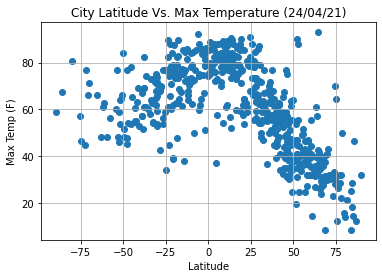

In [13]:
# Make folder to save the figures
wdir = os.getcwd() 
os.chdir(wdir)

outpath = os.path.join(wdir,'Figures')
os.makedirs(outpath, exist_ok=True)

plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.title('City Latitude Vs. Max Temperature (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\lat_vs_temp.png')

## Latitude vs. Humidity Plot

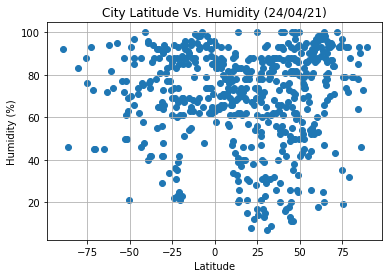

In [14]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.title('City Latitude Vs. Humidity (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\lat_vs_humid.png')

## Latitude vs. Cloudiness Plot

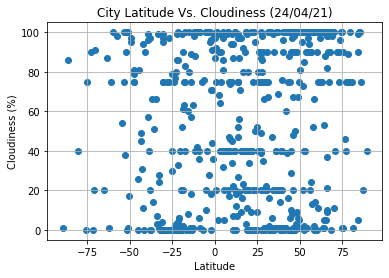

In [15]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.title('City Latitude Vs. Cloudiness (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\lat_vs_cloud.png')

## Latitude vs. Wind Speed Plot

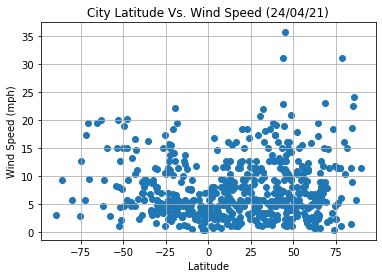

In [16]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.title('City Latitude Vs. Wind Speed (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\lat_vs_wind.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
# Create Dataset for Northern and Southern Hemisphere
Northern = clean_city_data[clean_city_data['Lat'] > 0]
Southern = clean_city_data[clean_city_data['Lat'] < 0]


The r-squared is: 0.6909692394233813


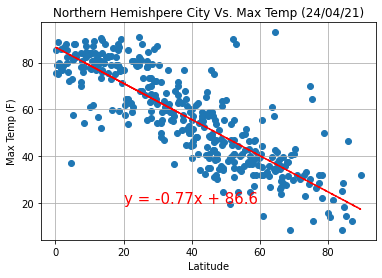

In [18]:
# Linear Regression
n_temp_slope, n_temp_int, n_temp_r, n_temp_p, n_temp_std_err = st.linregress(Northern['Lat'], Northern['Max Temp'])
n_temp_fit = n_temp_slope * Northern['Lat'] + n_temp_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(n_temp_slope,2)) + "x + " + str(round(n_temp_int,2))
plt.plot(Northern['Lat'],n_temp_fit,"--", color = 'red')
plt.scatter(Northern['Lat'], Northern['Max Temp'])
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title('Northern Hemishpere City Vs. Max Temp (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\\N_lat_vs_temp.png')
print(f"The r-squared is: {n_temp_r**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.17509699068825973


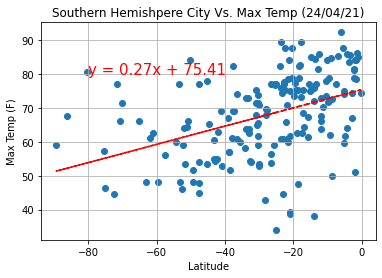

In [19]:
s_temp_slope, s_temp_int, s_temp_r, s_temp_p, s_temp_std_err = st.linregress(Southern['Lat'], Southern['Max Temp'])
s_temp_fit = s_temp_slope * Southern['Lat'] + s_temp_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(s_temp_slope,2)) + "x + " + str(round(s_temp_int,2))
plt.plot(Southern['Lat'],s_temp_fit,"--", color = 'red')
plt.scatter(Southern['Lat'], Southern['Max Temp'])
plt.annotate(line_eq,(-80,80),fontsize=15,color="red")
plt.title('Southern Hemishpere City Vs. Max Temp (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\S_lat_vs_temp.png')
print(f"The r-squared is: {s_temp_r**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.026415815968267375


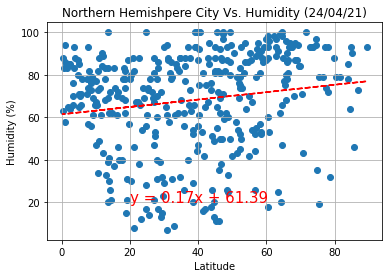

In [20]:
n_hum_slope, n_hum_int, n_hum_r, n_hum_p, n_hum_std_err = st.linregress(Northern['Lat'], Northern['Humidity'])
n_hum_fit = n_hum_slope * Northern['Lat'] + n_hum_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(n_hum_slope,2)) + "x + " + str(round(n_hum_int,2))
plt.plot(Northern['Lat'],n_hum_fit,"--", color = 'red')
plt.scatter(Northern['Lat'], Northern['Humidity'])
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title('Northern Hemishpere City Vs. Humidity (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\\N_lat_vs_humid.png')
print(f"The r-squared is: {n_hum_r**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010306710721899866


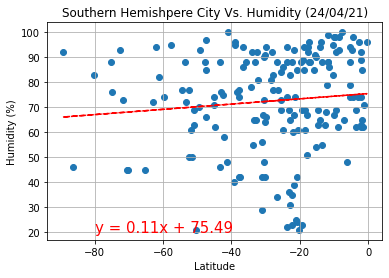

In [21]:
s_hum_slope, s_hum_int, s_hum_r, s_hum_p, s_hum_std_err = st.linregress(Southern['Lat'], Southern['Humidity'])
s_hum_fit = s_hum_slope * Southern['Lat'] + s_hum_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(s_hum_slope,2)) + "x + " + str(round(s_hum_int,2))
plt.plot(Southern['Lat'],s_hum_fit,"--", color = 'red')
plt.scatter(Southern['Lat'], Southern['Humidity'])
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.title('Southern Hemishpere City Vs. Humidity (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\S_lat_vs_humid.png')
print(f"The r-squared is: {s_hum_r**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015305710192708029


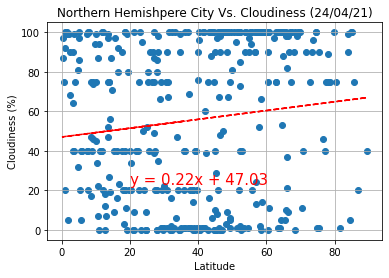

In [22]:
n_cl_slope, n_cl_int, n_cl_r, n_cl_p, n_cl_std_err = st.linregress(Northern['Lat'], Northern['Cloudiness'])
n_cl_fit = n_cl_slope * Northern['Lat'] + n_cl_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(n_cl_slope,2)) + "x + " + str(round(n_cl_int,2))
plt.plot(Northern['Lat'],n_cl_fit,"--", color = 'red')
plt.scatter(Northern['Lat'], Northern['Cloudiness'])
plt.annotate(line_eq,(20,23),fontsize=15,color="red")
plt.title('Northern Hemishpere City Vs. Cloudiness (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\\N_lat_vs_cloud.png')
print(f"The r-squared is: {n_cl_r**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001858017116341453


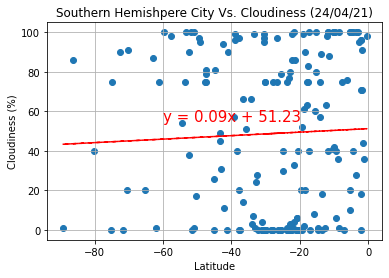

In [23]:
s_cl_slope, s_cl_int, s_cl_r, s_cl_p, s_cl_std_err = st.linregress(Southern['Lat'], Southern['Cloudiness'])
s_cl_fit = s_cl_slope * Southern['Lat'] + s_cl_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(s_cl_slope,2)) + "x + " + str(round(s_cl_int,2))
plt.plot(Southern['Lat'],s_cl_fit,"--", color = 'red')
plt.scatter(Southern['Lat'], Southern['Cloudiness'])
plt.annotate(line_eq,(-60,55),fontsize=15,color="red")
plt.title('Southern Hemishpere City Vs. Cloudiness (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\S_lat_vs_cloud.png')
print(f"The r-squared is: {s_cl_r**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02590397749322938


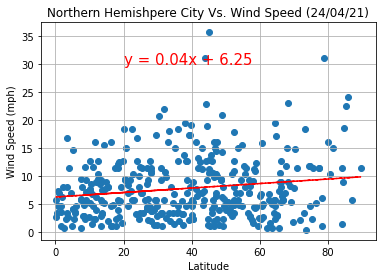

In [24]:
n_w_slope, n_w_int, n_w_r, n_w_p, n_w_std_err = st.linregress(Northern['Lat'], Northern['Wind Speed'])
n_w_fit = n_w_slope * Northern['Lat'] + n_w_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(n_w_slope,2)) + "x + " + str(round(n_w_int,2))
plt.plot(Northern['Lat'],n_w_fit,"--", color = 'red')
plt.scatter(Northern['Lat'], Northern['Wind Speed'])
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.title('Northern Hemishpere City Vs. Wind Speed (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\\N_lat_vs_wind.png')
print(f"The r-squared is: {n_w_r**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11813338508952372


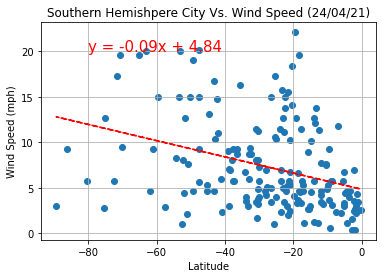

In [25]:
s_w_slope, s_w_int, s_w_r, s_w_p, s_w_std_err = st.linregress(Southern['Lat'], Southern['Wind Speed'])
s_w_fit = s_w_slope * Southern['Lat'] + s_w_int
# Create equation of line to predict temp based on latitude coordinate
line_eq = "y = " + str(round(s_w_slope,2)) + "x + " + str(round(s_w_int,2))
plt.plot(Southern['Lat'],s_w_fit,"--", color = 'red')
plt.scatter(Southern['Lat'], Southern['Wind Speed'])
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.title('Southern Hemishpere City Vs. Wind Speed (24/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(which = 'major', axis = 'both')
plt.savefig('Figures\S_lat_vs_wind.png')
print(f"The r-squared is: {s_w_r**2}")

# Bonus

 Create a function that will create these charts based on different parameters.

In [26]:
import scipy.stats as st
import pandas as pd 
import numpy as np

def plot_correlation(x_data, y_data, title, xlabel, ylabel, fname):
    slope, intercept, r_val, val_p, val_std_err = st.linregress(x_data, y_data)
    line_fit = slope * x_data + intercept
    # Create equation of line to predict temp based on latitude coordinate
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_data,line_fit,"--", color = 'red')
    plt.scatter(x_data, y_data)
    plt.annotate(line_eq,(20,20),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(which = 'major', axis = 'both')
    # This is stored in the same folder as the WeatherPy not in Figures folder
    plt.savefig(f'{fname}')
    print(f"The r-squared is: {r_val**2}")

The r-squared is: 0.6909692394233813


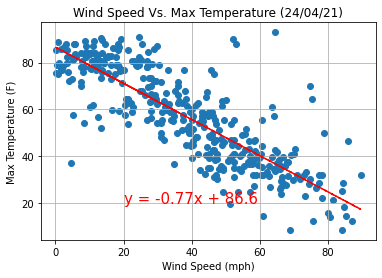

In [27]:
# Input
x_data = Northern['Lat']
y_data = Northern['Max Temp']
title = 'Wind Speed Vs. Max Temperature (24/04/21)'
xlabel = 'Wind Speed (mph)'
ylabel = 'Max Temperature (F)'
fname = 'Wind_v_temp.png'

# Use function to plot
plot_correlation(x_data, y_data,title,xlabel,ylabel,fname)


# Summary

Observed trend from the data:
- There is high correlation between latitude and max temp
- There is very little correlation between latitude and humidity temp
- There is very little correlation between latitude and cloudiness
- There is very little correlation between latitude and wind speed
- For City closer to equator the max temperature will increase